## Homework 1: Multilayer Feedforward Network


**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, David Sondak

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- Please name your  file name  as `HW1-Group#.ipynb` where `Group#` is your assigned group number.

- Send your completed Jupyter notebook to the course TF.

- This homework can be submitted in pairs. Submit only one per group. 

**Names of the people in your group:**
* 
* 
* 
<br><br>

<div class="theme"> Overview </div>

In this homework, you are free to explore different ways of solving the problems -within the restrictions of the questions. Your solutions should read like a report with figures to support your statements. Please include your code cells but augment your solutions with written answers. We will also check for code readability and efficiency. In particular, we expect you to write appropriate functions so that your code can be generalized beyond the specified network architectures of this homework.

For this homework you may **not** use a machine learning library such as `keras` or `tensorflow` to build and fit the network. The objective is to build the network equations from scratch.

- The question explores approximating a function using a **Multilayer Feedforward Network** with one input layer, one hidden layer, and one output layer.

<div class="exercise"> <b> Question 1: Construct a feed forward neural network [50 pts]</b> </div>
    
#### Problem Overview 
You will construct three feed forward neural networks each with a single hidden later.  The networks will have an input layer, one hidden layer with 1, 2 and 4 nodes respectively, and an output layer.  The hidden layer should use the sigmoid as the activation function and use a linear  output node.

**You must code the equations from scratch.**  You may use Lab 1 to guide your implementation.

#### Data
You are given three datasets containing ($x,y$) points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

#### Questions to Answer
**1.1** Create a plot of each dataset.  You can make separate plots, subplots, or put them all on the same plot.  Make sure your figures are clearly labeled with axes labels, titles, and legends as appropriate.<br><br>

**1.2** 
* Perform a forward pass using the data for the **single step** function and a hidden layer of **one** node 
* **Manually** tune the weights
* Plot the output from the network on the same plot as the true $f(x)$ values (from the provided dataset)
* Continue to manually adjust the weights until you get the best agreement between the network output and $f(x)$ that you can<br><br>

**1.3** Do the same thing for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.<br><br>

**1.4** Do the same for the **two hump** function data but this time increase the number of hidden nodes to **four**. <br><br>

**1.5** 
* Choose the appropriate loss function and calculate and report the loss from parts 1.2, 1.3, and 1.4.  You can report this in a tabular form:

|  Problem | Loss  |
| :---:    | :---: |
| 1.2      |       |
| 1.3      |       |
| 1.4      |       |

* Derive the gradient of the output layer's weights for all three cases (step, one hump and two humps).
  - **Note:** Your expression should be an exact mathematical expression.
  - **Hint:** Present your answer in a Markdown cell using Latex.  To include Latex in your notebook, you can include your Latex expression between dollar signs like so: `$$ latex expression $$`.  Here is a Latex cheatsheat: [Latex Cheatsheet](ftp://ftp.dante.de/tex-archive/info/latex-refsheet/LaTeX_RefSheet.pdf)
* Perform gradient descent to find the best weights for each case.
  - **Note:** You should write your own gradient descent function.  You do not need to perform stochastic gradient descent.
  - **Hint:** Use the weights for the hidden layers you found in the previous questions as an initial guess.
* What is the optimised weight value and loss you obtained for each problem? 
* How many steps did you take to reach this value? 
* What is the threshold value you used to stop?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def readable_plot(ax, xlab=r'', ylab=r'', title=r'', fontsize=24, labelsize=20, leg=True, leg_loc='best'):
    ax.set_xlabel(xlab, fontsize=fontsize)
    ax.set_ylabel(ylab, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)

    ax.tick_params(labelsize=labelsize)

    if leg:
        ax.legend(loc=leg_loc, fontsize=fontsize)

### Answers

**1.1** 

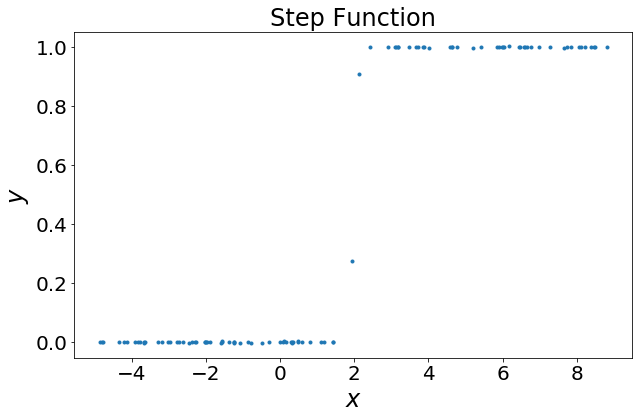

In [4]:
# step function data
step = np.loadtxt(open("step_df.csv"), delimiter=",", skiprows=1)
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(step[:,0], step[:,1], '.')
readable_plot(ax, r'$x$', r'$y$', title=r'Step Function', fontsize=24, labelsize=20, leg=False)

plt.show()

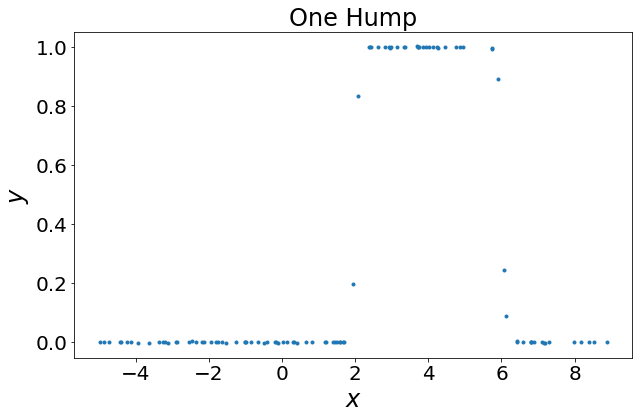

In [5]:
# one hump data
one_hump = np.loadtxt(open("one_hump_df.csv"), delimiter=",", skiprows=1)
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(one_hump[:,0], one_hump[:,1], '.')
readable_plot(ax, r'$x$', r'$y$', title=r'One Hump', fontsize=24, labelsize=20, leg=False)

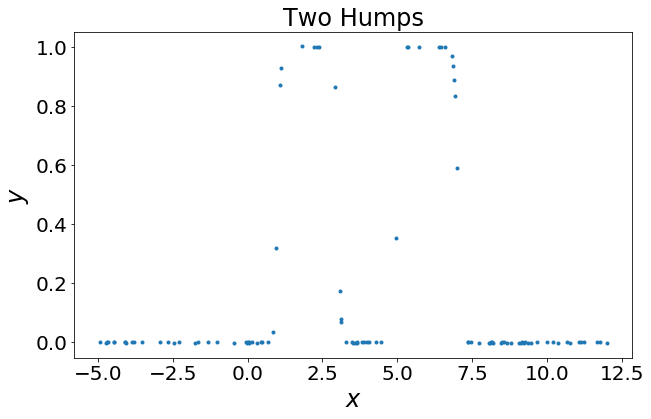

In [6]:
# two hump data
two_hump = np.loadtxt(open("two_hump_df.csv"), delimiter=",", skiprows=1)
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(two_hump[:,0], two_hump[:,1], '.')
readable_plot(ax, r'$x$', r'$y$', title=r'Two Humps', fontsize=24, labelsize=20, leg=False)

plt.show()

In [7]:
# First define some convenience functions
def nodes(x, w, b):
    # Output of the hidden layer of arbitrary size
    try:
        z = np.tensordot(w, x, axes=0) + b.reshape((len(w),-1))
    except AttributeError:
        z = np.tensordot(w, x, axes=0) + b
    
    return 1.0 / (1.0 + np.exp(-z))

def output(h, wout, bout):
    # Output of the network (scalar)
    try:
        return np.tensordot(wout, h, axes=1) + bout
    except IndexError:
        return wout * h + bout


In [8]:
# Give data more intuitive names
x_step = step[:,0]
f_step = step[:,1]

x_one_hump = one_hump[:,0]
f_one_hump = one_hump[:,1]

x_two_hump = two_hump[:,0]
f_two_hump = two_hump[:,1]

**1.2** 

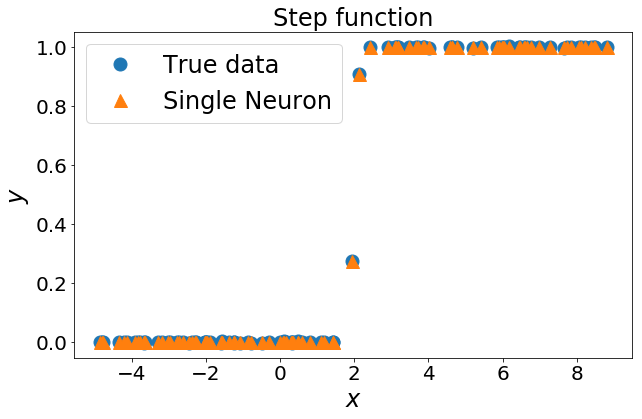

In [9]:
# Now use network to get a prediction on the step function

# Set weights and biases for hidden layers
w = 20.0
b = -40.0

# Set weights and biases from output layer
wout = 1.0
bout = 0.0

h = nodes(x_step, w, b) # Get hidden layer output

fhat_step = output(h, wout, bout) # Network prediction

# Make plots of prediction and solution
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x_step, f_step, ls='', marker='o', ms=13, label='True data')
ax.plot(x_step, fhat_step, ls='', marker='^', ms=13, label='Single Neuron')

readable_plot(ax, r'$x$', r'$y$', title=r'Step function', fontsize=24, labelsize=20, 
              leg=True, leg_loc='best')

plt.show()

**1.3** 

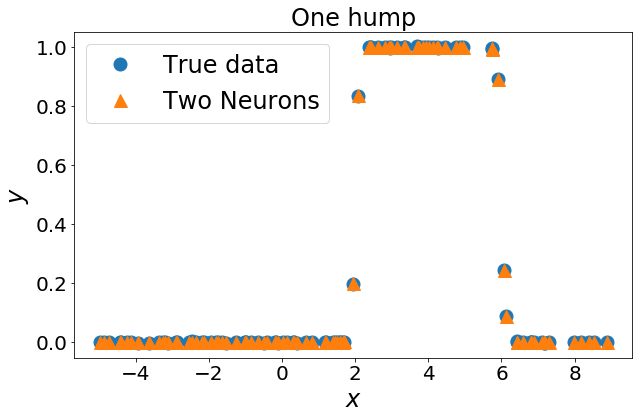

In [10]:
# Set weights and biases for hidden layers
w = np.array([20.0, 20.0])
b = np.array([-40.0, -120.0])

# Set weights and biases from output layer
wout = np.array([1.0, -1.0])
bout = 0.0

h = nodes(x_one_hump, w, b) # Get hidden layer output

fhat_one_hump = output(h, wout, bout) # Network prediction

# Make plots of prediction and solution
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(x_one_hump, f_one_hump, ls='', marker='o', ms=13, label='True data')
ax.plot(x_one_hump, fhat_one_hump, ls='', marker='^', ms=13, label='Two Neurons')

readable_plot(ax, r'$x$', r'$y$', title=r'One hump', fontsize=24, labelsize=20, 
              leg=True, leg_loc='best')

plt.show()

**1.4**

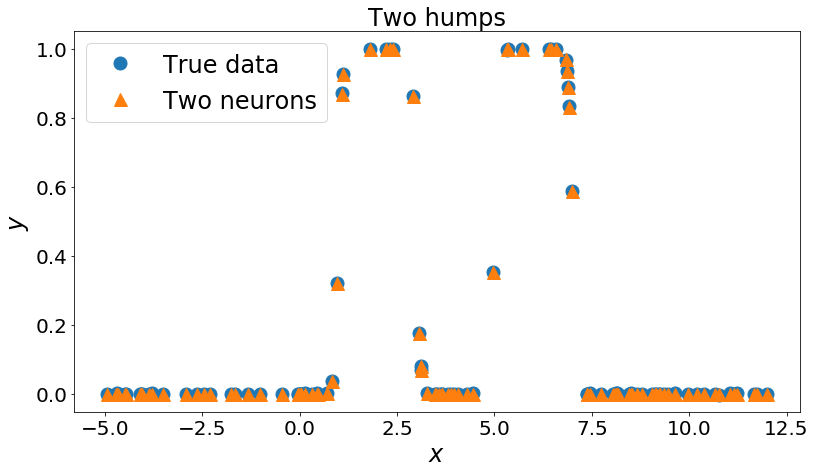

In [11]:
# Set weights and biases for hidden layers
w = np.array([20.0, 20.0, 20.0, 20.0])
b = np.array([-20.0, -60.0, -100.0, -140.0])

# Set weights and biases from output layer
wout = np.array([1.0, -1.0, 1.0, -1.0])
bout = 0.0

h = nodes(x_two_hump, w, b) # Get hidden layer output

fhat_two_hump = output(h, wout, bout) # Network prediction

# Make plots of prediction and solution
fig, ax = plt.subplots(1,1, figsize=(13,7))

ax.plot(x_two_hump, f_two_hump, ls='', marker='o', ms=13, label='True data')
ax.plot(x_two_hump, fhat_two_hump, ls='', marker='^', ms=13, label='Two neurons')

readable_plot(ax, r'$x$', r'$y$', title=r'Two humps', fontsize=24, labelsize=20, 
              leg=True, leg_loc=2)

plt.show()

**1.5** 

In [12]:
import pandas as pd

# MSE
mse_step = np.sum((f_step - fhat_step)**2.0)
mse_one_hump = np.sum((f_one_hump - fhat_one_hump)**2.0)
mse_two_hump = np.sum((f_two_hump - fhat_two_hump)**2.0)

# Store in pandas dataframe just to make things look nice
pd.options.display.float_format = '{:,.6e}'.format
mse_df = pd.DataFrame([('1.2', mse_step), ('1.3', mse_one_hump), ('1.3', mse_two_hump)],
                  columns=['Problem', 'MSE'])

mse_df

,Problem,MSE
0,1.2,1.410355e-04
1,1.3,1.173662e-04
2,1.3,8.031526e-05


### Gradient of Loss Function
The $L_{2}$ loss function is a good choice for this problem. 
$$L = \sum_{i=1}^{N}{\left(y\left(x_{i}\right) - \widehat{y}\left(x_{i}\right)\right)^{2}}.$$
The networks that we considered in this homework have 
$$\widehat{y}\left(x\right) = \sum_{k=1}^{M}{v_{k}h_{k}\left(x\right) + b_{\text{out}}}$$
where $M$ is the number of hidden nodes.  Note that we have used $v_{k}$ to denote the output weight corresponding to hidden node $k$ and $h_{k}\left(x\right)$ is the activation from hidden node $k$.  We consider the gradient with respect to output weights $v$.

##### A Single Node
The loss function for a single node is
$$L = \sum_{i=1}^{N}{\left(y\left(x_{i}\right) - \left(vh\left(x_{i}\right) + b\right)\right)^{2}}$$
and its gradient with respect to $v$ is 
$$\dfrac{\partial L}{\partial v} = -2 \sum_{i=1}^{N}{\left(y\left(x_{i}\right) - \left(vh\left(x_{i}\right) + b\right)\right) h\left(x_{i}\right)}.$$

##### Two Nodes
The loss function and its gradient are
$$L = \sum_{i=1}^{N}{\left(y\left(x_{i}\right) - \left(v_{1}h_{1}\left(x_{i}\right) + v_{2}h_{2}\left(x_{i}\right) + b\right)\right)^{2}}$$ and 
\begin{align}
  \nabla L = 
  \begin{bmatrix}
    &-2 \displaystyle\sum_{i=1}^{N}{\left(y\left(x_{i}\right) - \left(v_{1}h_{1}\left(x_{i}\right) + v_{2}h_{2}\left(x_{i}\right) + b\right)\right) h_{1}\left(x_{i}\right)} \\
    &-2 \displaystyle\sum_{i=1}^{N}{\left(y\left(x_{i}\right) - \left(v_{1}h_{1}\left(x_{i}\right) + v_{2}h_{2}\left(x_{i}\right) + b\right)\right) h_{2}\left(x_{i}\right)}
  \end{bmatrix}.
\end{align}

##### Four Nodes
The loss function is,
$$L = -2\sum_{i=1}^{N}{\left(y\left(x_{i}\right) - \left(v_{1}h_{1}\left(x_{i}\right) + v_{2}h_{2}\left(x_{i}\right) + v_{3}h_{3}\left(x_{i}\right) + v_{4}h_{4}\left(x_{i}\right) + b\right)\right)^{2}}.$$
The expressions are getting long.  Let's work with index notation.  The gradient is now,
$$\dfrac{\partial L}{\partial v_{j}} = \sum_{i=1}^{N}{\left(y\left(x_{i}\right) - \left(v_{1}h_{1}\left(x_{i}\right) + v_{2}h_{2}\left(x_{i}\right) + v_{3}h_{3}\left(x_{i}\right) + v_{4}h_{4}\left(x_{i}\right) + b\right)\right) h_{j}\left(x_{i}\right)}, \quad j = 1,2,3,4$$

##### In General
$$\dfrac{\partial L}{\partial v_{j}} = -2\sum_{i=1}^{N}{\left(y\left(x_{i}\right) - \widehat{y}\left(x_{i}\right)\right) h_{j}\left(x_{i}\right)}, \quad j = 1,\ldots,M.$$

#### Gradient Descent

In [13]:
def gradient(x, wh, bh, wout, bout, y):
    h = nodes(x, wh, bh) # Get hidden layer output
    yhat = output(h, wout, bout) # Network prediction
    # Hard code the derivative
    der = (y - yhat) * h # Summand
    # Derivative: Kind of clunky b/c of shapes, but o.k. for now
    if len(np.shape(der)) == 1:
        g = -2.0 * np.sum(der)
    else:
        g = -2.0 * np.sum(der, axis=1)
    return g

def gradient_descent(x, y, wh, bh, v, b=0.0, lmbda=0.0001, tol=1.0e-05, verbose=False):
    # Gradient wrt output weights
    it = 0
    while True:
        dv = lmbda * gradient(x, wh, bh, v, b, y) # Weight increment
        norm_dv = np.linalg.norm(dv) # Check size of increment
        if verbose:
            print(it, norm_dv) # Print progress
        # Check if tolerance is good
        if norm_dv < tol:
            v -= dv
            print("Solution found after {0} iterations.".format(it+1))
            break
        v -= dv # Update weights
        it += 1 # Increment
    
    return v

In [14]:
### One node, step function

# Hidden weights
wh = 20.0
bh = -40.0

wout = 0.1 # Initial guess

# Apply gradient descent
vout_step = gradient_descent(x_step, f_step, wh, bh, wout, lmbda=1.0e-02)

print("Output weight for single neuron found to be: {0:8.6f}".format(vout_step))

Solution found after 7 iterations.
Output weight for single neuron found to be: 0.999995


In [15]:
### Two nodes, one hump

# Set weights and biases for hidden layers
wh = np.array([20.0, 20.0])
bh = np.array([-40.0, -120.0])

wout = np.array([0.75, -0.85]) # Initial guess

# Apply gradient descent
vout_one_hump = gradient_descent(x_one_hump, f_one_hump, wh, bh, wout, lmbda=1.0e-02)

print("Output weight for two neurons found to be: {0}".format(vout_one_hump))

Solution found after 44 iterations.
Output weight for two neurons found to be: [ 1.00012067 -0.99992735]


In [16]:
### Four nodes, one hump

# Set weights and biases for hidden layers
wh = np.array([20.0, 20.0, 20.0, 20.0])
bh = np.array([-20.0, -60.0, -100.0, -140.0])

# Set weights and biases from output layer
wout = np.array([0.9, -0.7, 0.7, -0.9])

# Apply gradient descent
vout_two_hump = gradient_descent(x_two_hump, f_two_hump, wh, bh, wout, 
                                 lmbda=1.0e-03, verbose=False)

print("Output weight for four neurons found to be: {0}".format(vout_two_hump))

Solution found after 1014 iterations.
Output weight for four neurons found to be: [ 0.99923837 -0.99898493  0.99967504 -0.99991976]
